### reassessing frontal length scales

In [49]:
structure=150  # number of structure in ensemble
efold=1      # number of efolds to judge frontal length

# plotting shortcuts
fsize    = 25
ticksize = 20

In [50]:
import numpy as np
import functions as zf
import pickle
import matplotlib.pyplot as plt

In [51]:
with open(f'front_ensemble.pkl', 'rb') as fens:
            ensemble = pickle.load(fens)
            
distance = ensemble[structure]['Distance']
sst      = ensemble[structure]['SST']

grady   = np.abs(np.diff(sst)/np.diff(distance))
gradx   = distance[0:-1]+.005
maxgrad = np.where(grady==np.max(grady))

grad_change = np.abs((grady-grady[maxgrad])/grady[maxgrad])
frontx      = gradx[grad_change<=(1/(efold*np.e))]
fronty      = grady[grad_change<=(1/(efold*np.e))]

front       = np.where([grad_change<=(1/(efold*np.e))])[1]

lengthscale:90.0m 
magnitude:0.090cel.


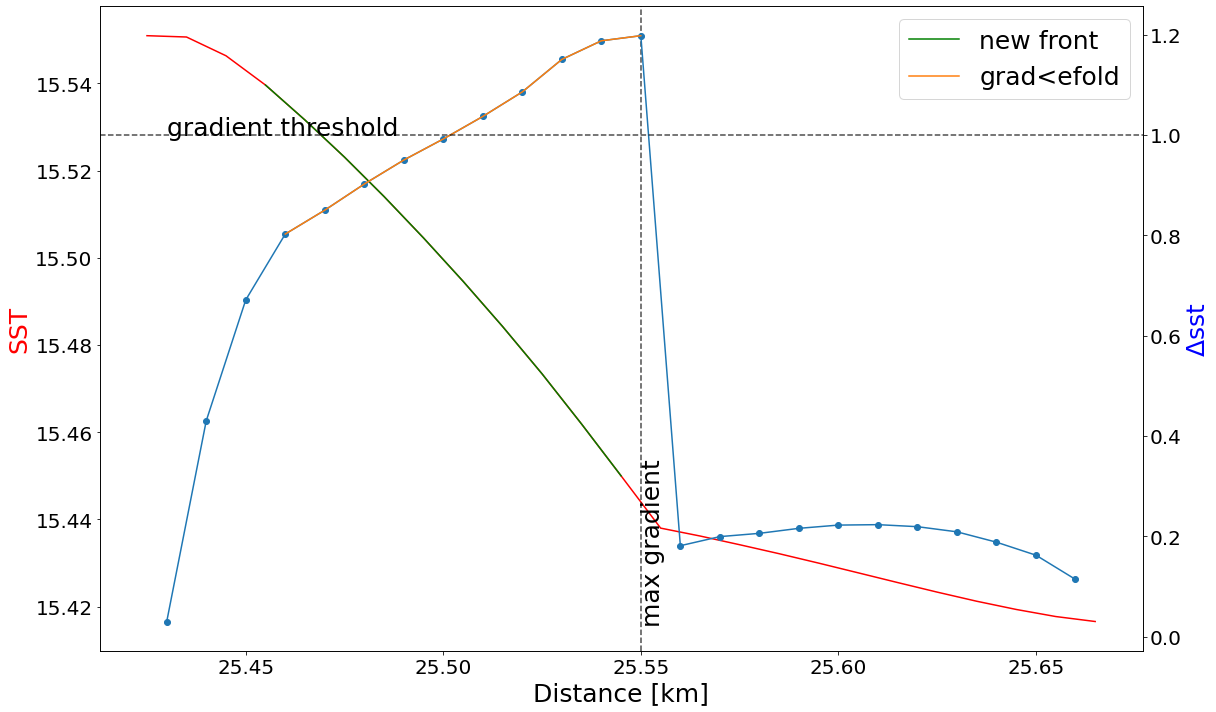

In [52]:
fig, ax1 = plt.subplots(1, figsize = (17,10))
ax2 = ax1.twinx()

ax1.plot(distance,sst,color='red')
line1,=ax1.plot(distance[front],sst[front],color='green',label='new front')
ax2.plot(gradx,grady,'-o')
line2,=ax2.plot(frontx,fronty,label='grad<efold')
ax1.axvline(gradx[maxgrad],linestyle = '--',color='k',alpha=.7),ax2.axhline(1.0,linestyle = '--',color='k',alpha=.7)
ax1.text(gradx[maxgrad],min(sst),'max gradient',rotation=90,fontsize=fsize),ax2.text(gradx[0],1.0,'gradient threshold',fontsize=fsize)

ax1.set_xlabel('Distance [km]',fontsize=fsize), ax1.set_ylabel('SST',fontsize=fsize,color='red'), ax2.set_ylabel('$\Delta$sst',fontsize=fsize,color='blue')
ax1.tick_params(axis='x',labelsize=ticksize), ax1.tick_params(axis='y',labelsize=ticksize), ax2.tick_params(axis='y',labelsize=ticksize)
# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best',fontsize=fsize)
plt.tight_layout()

print(f'lengthscale:{(frontx[-1]-frontx[0])*1000:.1f}m \nmagnitude:{np.abs(sst[front][-1]-sst[front][0]):.3f}cel.')

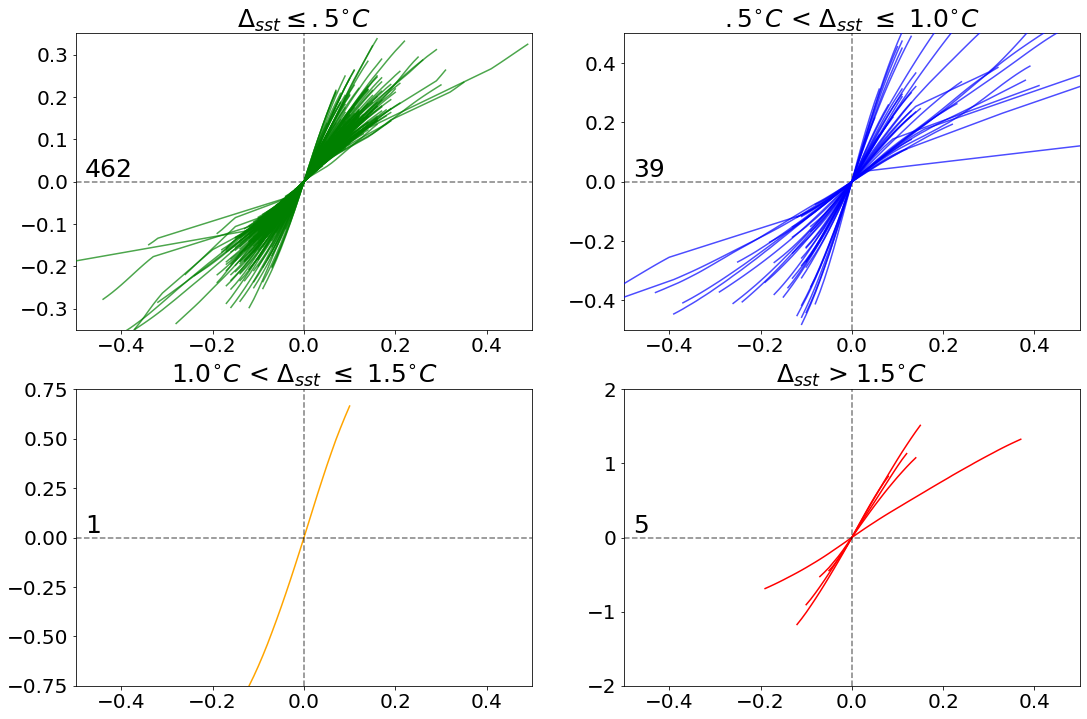

In [21]:
with open(f'front_ensemble.pkl', 'rb') as fens:
            ensemble = pickle.load(fens)
front_ens_subplots, ax = plt.subplots(2, 2, figsize=(18, 12))

uhlf_km, ohlf_km, over_km, ovr_hkm = 0,0,0,0

for index, date in enumerate(ensemble):
    distance = ensemble[index+1]['Distance']
    sst      = ensemble[index+1]['SST']

    grady   = np.abs(np.diff(sst)/np.diff(distance))
    gradx   = distance[0:-1]+.005
    maxgrad = np.where(grady==np.max(grady))

    grad_change = np.abs((grady-grady[maxgrad])/grady[maxgrad])
    front       = np.where([grad_change<=(1/(efold*np.e))])[1]
    
    frontx  = distance[front]
    fronty  = sst[front]
    centerx = distance[maxgrad]
    centery = sst[maxgrad]
    
    # normalize distance to distance from max gradient
    frontx = frontx-centerx
    # normalize sst 
    fronty = fronty-centery
    
    # change orientation (cold to warm)
    if (fronty[-1]<fronty[0]):
        frontx = frontx[-1::]
        fronty = fronty[-1::]
    
    if (fronty[-1]-fronty[0]) <= .5:
        ax[0,0].plot(frontx, fronty, color = 'green', zorder=4, alpha = .7)
        uhlf_km = uhlf_km+1
    elif (fronty[-1]-fronty[0]) <= 1:
        ax[0,1].plot(frontx, fronty, color = 'blue', zorder=3, alpha = .7)
        ohlf_km = ohlf_km+1
    elif (fronty[-1]-fronty[0]) <= 1.5:
        ax[1,0].plot(frontx, fronty, color = 'orange', zorder=2)
        over_km = over_km+1
    else:
        ax[1,1].plot(frontx, fronty, color = 'red', zorder=1)
        ovr_hkm = ovr_hkm+1
        
title_strings = ['$\Delta_{sst} \leq .5^{\circ}C$', '$.5^{\circ}C$ < $\Delta_{sst}$ $\leq$ 1.0$^{\circ}C$', \
                 '$1.0^{\circ}C$ < $\Delta_{sst}$ $\leq$ $1.5^{\circ}C$', '$\Delta_{sst}$ > $1.5^{\circ}C$']
number_front_perplot = [uhlf_km, ohlf_km, over_km, ovr_hkm]
yranges = np.array([.35,.5,.75,2]).reshape(2,2)

k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].axhline(0, linestyle = '--', color = 'k', alpha = .5)
        ax[i,j].axvline(0, linestyle = '--', color = 'k', alpha = .5)
        ax[i,j].set_xlim(-.5,.5),ax[i,j].set_ylim(-1*yranges[i,j],yranges[i,j])
        ax[i,j].tick_params(axis='both',labelsize=ticksize)
        ax[i,j].set_title(title_strings[k],fontsize=fsize)
        ax[i,j].text(-.48, 0, f'{number_front_perplot[k]}', fontsize=fsize, va = 'bottom')
        k = k + 1
    

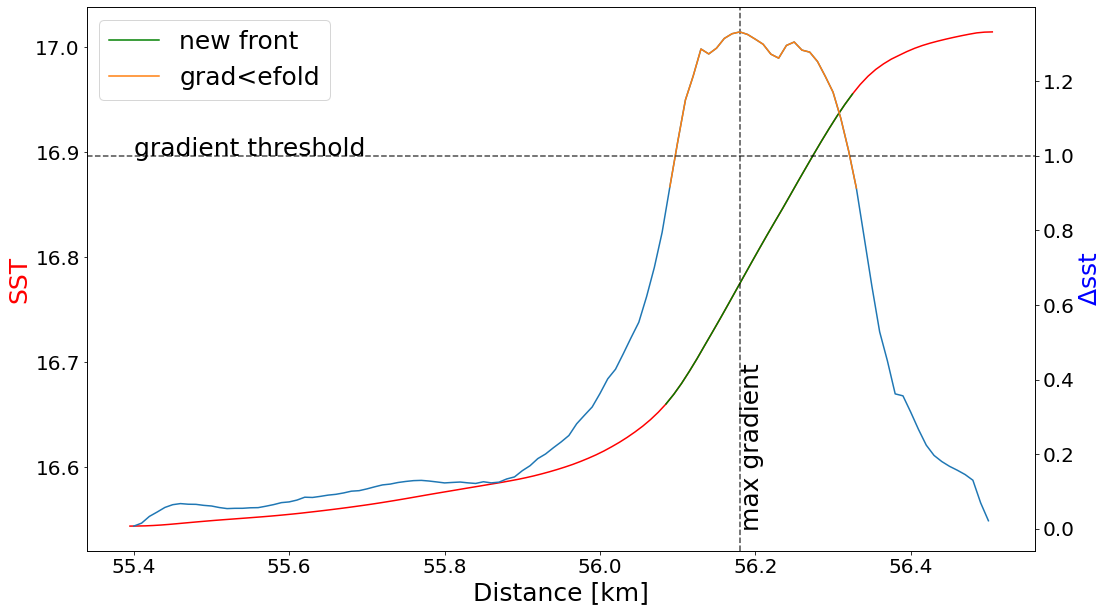

date:20200221,index:222 
lengthscale:240.0m 


KeyboardInterrupt: 

In [40]:
import time
from IPython.display import clear_output

with open(f'front_ensemble.pkl', 'rb') as fens:
            ensemble = pickle.load(fens)
        
for index, date in enumerate(ensemble):
    
    clear_output(wait=True)
    fig, ax1 = plt.subplots(1, figsize = (17,10))
    ax2 = ax1.twinx()
    clear_output(wait=True)
    distance = ensemble[index+1]['Distance']
    sst      = ensemble[index+1]['SST']

    grady   = np.abs(np.diff(sst)/np.diff(distance))
    gradx   = distance[0:-1]+.005
    maxgrad = np.where(grady==np.max(grady))

    grad_change = np.abs((grady-grady[maxgrad])/grady[maxgrad])
    frontx      = gradx[grad_change<=(1/(efold*np.e))]
    fronty      = grady[grad_change<=(1/(efold*np.e))]

    front       = np.where([grad_change<=(1/(efold*np.e))])[1]

    ax1.plot(distance,sst,color='red')
    line1,=ax1.plot(distance[front],sst[front],color='green',label='new front')
    ax2.plot(gradx,grady)
    line2,=ax2.plot(frontx,fronty,label='grad<efold')
    ax1.axvline(gradx[maxgrad],linestyle = '--',color='k',alpha=.7),ax2.axhline(1.0,linestyle = '--',color='k',alpha=.7)
    ax1.text(gradx[maxgrad],min(sst),'max gradient',rotation=90,fontsize=fsize),ax2.text(gradx[0],1.0,'gradient threshold',fontsize=fsize)

    ax1.set_xlabel('Distance [km]',fontsize=fsize), ax1.set_ylabel('SST',fontsize=fsize,color='red'), ax2.set_ylabel('$\Delta$sst',fontsize=fsize,color='blue')
    ax1.tick_params(axis='x',labelsize=ticksize), ax1.tick_params(axis='y',labelsize=ticksize), ax2.tick_params(axis='y',labelsize=ticksize)
    # Combine legends
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='best',fontsize=fsize)
    
    plt.show()

    date = ensemble[index+1]['Date']
    print(f'date:{date},index:{index+1} \nlengthscale:{(frontx[-1]-frontx[0])*1000:.1f}m \nmagnitude:{np.abs(sst[front][-1]-sst[front][0]):.3f}cel.',end='\r')
    
    time.sleep(6)
    
plt.ioff()
plt.close(fig)

In [391]:
def running_avg_filter(window_size, c_processed, dist_processed):
    failed_series = []
    # The windowsize will determine the number of points we span in our running average, mutliply this by the 10 meters 
    # to understand our window in terms of distance, and not just the number of points.
    # Start will be used for indexing in our loop, its initial value is 0, and is thus set to that prior to loop
    start = 0
    # The following are arrays that will hold our evenly spaced and smoothed data, as well as some of its stats. 
    c_filtered, dist_filtered = [], []
    # Loop will run from start of our data set to just a window size below it, otherwise we will get a run time error in indexing
    for i in range(len(dist_processed) - window_size):
        try:
            # set up latter bound of index
            end = start + window_size
            # Index from start, 0 at i = 1 or x based on ith, to the end, start plus our window
            distance_bounds = dist_processed[start:end+1] # we add 1 as indexing is naturally non-inclusive
            start = i+1 # Just add one to our index so that we shift the moving average by 1 pt. or 10 meters each time 
            # With C DATA  of the desired window selected, take all within these bounds 
            C_bounds = c_processed[start:end+1]
            c_filtered = np.append(c_filtered, sum(C_bounds)/len(C_bounds))
            dist_filtered = np.append(dist_filtered, np.median(distance_bounds))
        except:
            failed_series = np.append(failed_series, distance_bounds)
        continue
    return c_filtered, dist_filtered

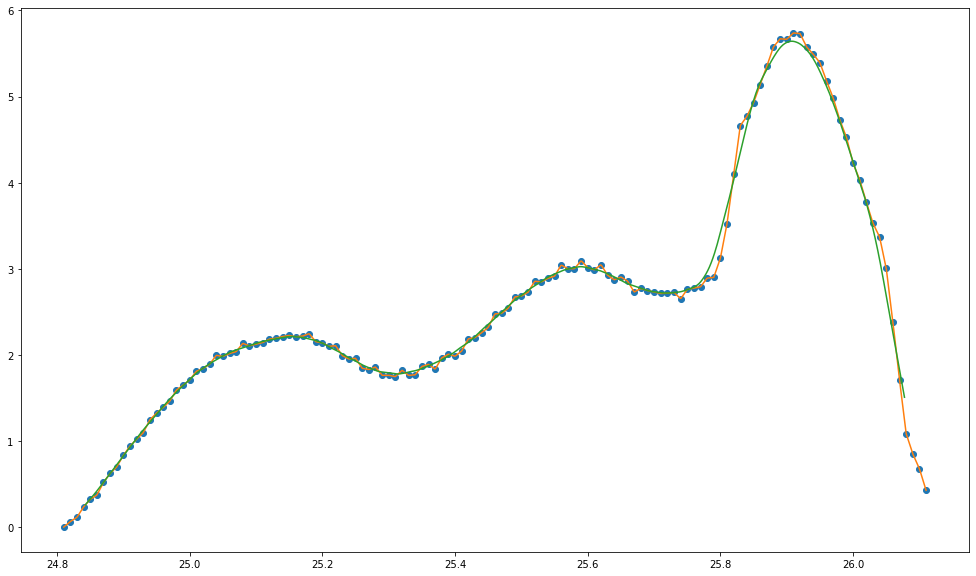

In [393]:
fig, ax1 = plt.subplots(1, figsize = (17,10))

gradx_interp = np.linspace(gradx[0],gradx[-1],1000)
grady_interp = np.interp(gradx_interp,gradx,grady)

grady_filt,gradx_filt = running_avg_filter(50,grady_interp,gradx_interp)


plt.plot(gradx,grady, 'o')
plt.plot(gradx_interp,grady_interp)
plt.plot(gradx_filt,grady_filt)